<a href="https://colab.research.google.com/github/KiyongAhn/rep01/blob/master/32_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transfer_Learning

### Your name :

#### 쉽지만 중요한 코너!

이미, '잘 만들어진'모델들을 가져다가 사용해보자.

[이 링크를 참고해보자](https://keras.io/applications/)

![transfer](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/05/31112715/finetune1.jpg)
--------------------------
Rayleigh Kim @ D:plus

## 라이브러리 로딩

In [0]:
import tensorflow as tf
import keras
from keras import backend as K
%matplotlib inline

from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.applications.inception_v3 import decode_predictions
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

from keras.layers import GlobalAveragePooling2D, Dense


import numpy as np
import matplotlib.pyplot as plt
import glob


Using TensorFlow backend.


## 데이터 수집합시다!

* 최소 조건 : 클래스 3개, 한 클래스당 7장 이상. **많으면 좋다!**
* imagenet data에는 확실히 없을만 한 걸로.
* **좋은결과**를 위해서라면 확실히 차이는 것들로
* **도전(역경)**을 위해서라면 비슷비슷 한걸로

* 클래스당 폴더 하나를 만들어서 구글 드라이브의 실습폴더에 업로드.

In [0]:
from google.colab import drive

In [0]:
drive.mount('./transfer')

Mounted at ./transfer


In [0]:
cd transfer/My Drive

/content/transfer/My Drive


In [0]:
cd Deep_Vision

/content/transfer/My Drive/Deep_Vision


In [0]:
ls

11_Colab_Basics.ipynb
12_Python_basics.ipynb
13_Numpy.ipynb
14_Pandas.ipynb
15번연습.ipynb
15_Quick_TF.ipynb
190711_모닝테스트.ipynb
21_Quick_Keras.ipynb
21연습_Quick_Keras.ipynb
22_ANN_with_Keras.ipynb
23_Keras_More_and_Deep_Learning.ipynb
23연습_Keras_More_and_Deep_Learning.ipynb
23_Keras_More_and_Deep_Learning___ORIGINAL.ipynb
24_My_First_CNN.ipynb
25_CNN_More.ipynb
31_Others_CNN.ipynb
32_Transfer_Learning.ipynb
33_AutoEncoder101.ipynb
captainamerica/
Cats/
Graduate_apply.csv.xlsx
ironman/
memo01.txt
my_first_save.h5
my_mnist/
Stock_Edwards_Lifesciences_corporation.csv.xlsx
torr/
Untitled0.ipynb
Untitled1.ipynb


In [0]:
class0 = glob.glob('armstrong/*')
class1 = glob.glob('bleach/*')
class2 = glob.glob('opm/*')

labels = ['armstrong', 'bleach', 'opm']

In [0]:
class0 = glob.glob('ironman/*')
class1 = glob.glob('captainamerica/*')
class2 = glob.glob('torr/*')

labels = ['ironman', 'captainamerica', 'torr']

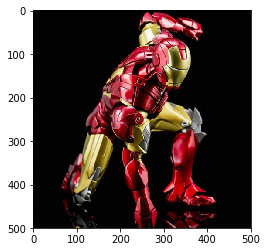

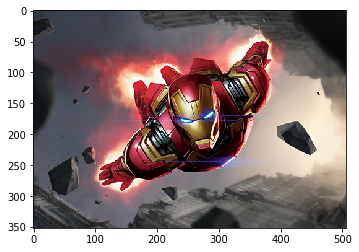

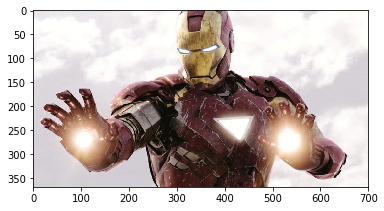

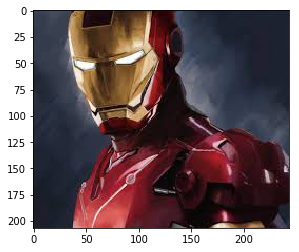

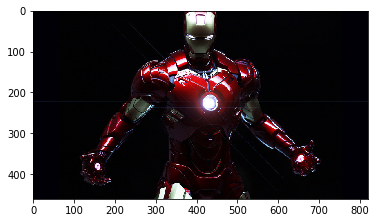

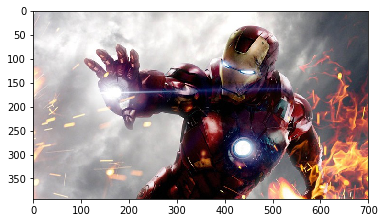

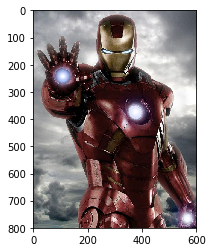

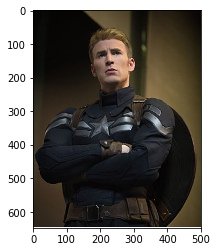

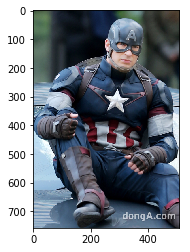

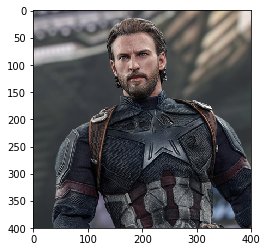

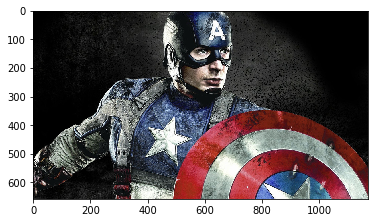

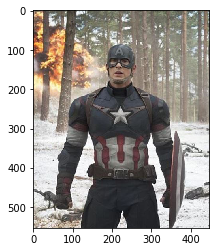

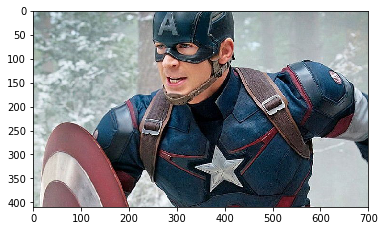

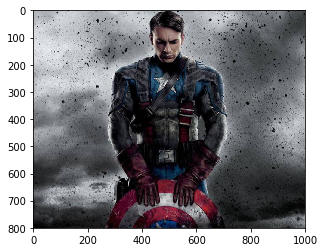

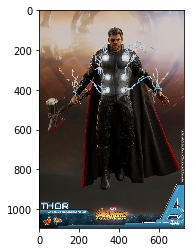

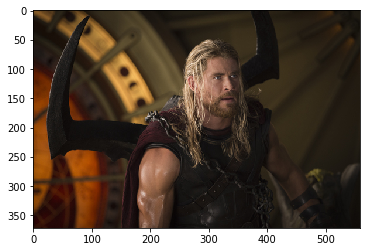

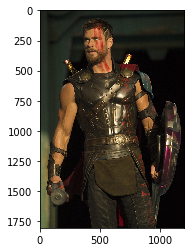

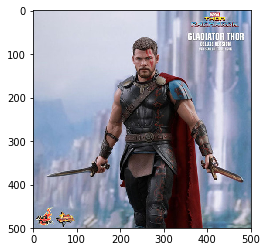

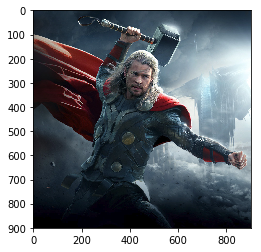

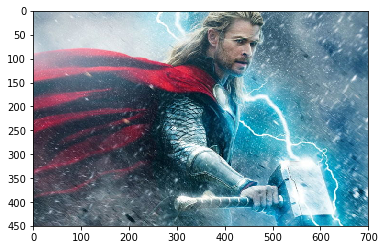

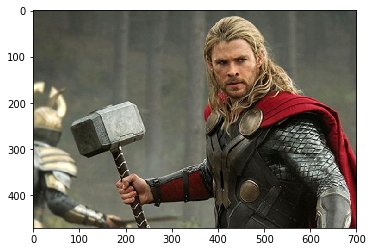

(7, 299, 299, 3) (7, 299, 299, 3) (7, 299, 299, 3)


In [0]:
cl0_img = []
cl1_img = []
cl2_img = []

for path in class0:
    img = image.load_img(path, grayscale = False, target_size = (299,299) )
    img = image.img_to_array(img)
    img = preprocess_input(img)
    cl0_img.append(img)
    plt.imshow(image.load_img(path))
    plt.show()
#     plt.imshow(image.load_img(path, target_size = (299,299)))
#     plt.show()
    
for path in class1:
    img = image.load_img(path, grayscale = False, target_size = (299,299) )
    img = image.img_to_array(img)
    img = preprocess_input(img)
    cl1_img.append(img)
    plt.imshow(image.load_img(path))
    plt.show()
#     plt.imshow(image.load_img(path, target_size = (299,299)))
#     plt.show()
    
for path in class2:
    img = image.load_img(path, grayscale = False, target_size = (299,299) )
    img = image.img_to_array(img)
    img = preprocess_input(img)
    cl2_img.append(img)
    plt.imshow(image.load_img(path))
    plt.show()
#     plt.imshow(image.load_img(path, target_size = (299,299)))
#     plt.show()

cl0_img = np.array(cl0_img)
cl1_img = np.array(cl1_img)
cl2_img = np.array(cl2_img)
print(cl0_img.shape, cl1_img.shape, cl2_img.shape)

In [0]:
### 라벨링

label0 = np.full((cl0_img.shape[0],), 0)
label1 = np.full((cl1_img.shape[0],), 1)
label2 = np.full((cl2_img.shape[0],), 2)


print(label0)

[0 0 0 0 0 0 0]


## 데이터를 나누자, train-valid-test

In [0]:
train0, valid0, test0 = cl0_img[:4], cl0_img[4:5], cl0_img[5:]
train1, valid1, test1 = cl1_img[:4], cl1_img[4:5], cl1_img[5:]
train2, valid2, test2 = cl2_img[:4], cl2_img[4:5], cl2_img[5:]

train_x = np.concatenate((train0,train1,train2))
valid_x = np.concatenate((valid0,valid1, valid2))
test_x = np.concatenate((test0,test1, test2))

print(train_x.shape, valid_x.shape, test_x.shape)

(12, 299, 299, 3) (3, 299, 299, 3) (6, 299, 299, 3)


In [0]:
train0, valid0, test0 = label0[:4], label0[4:5], label0[5:]
train1, valid1, test1 = label1[:4], label1[4:5], label1[5:]
train2, valid2, test2 = label2[:4], label2[4:5], label2[5:]

train_y = np.concatenate((train0,train1,train2))
valid_y = np.concatenate((valid0,valid1, valid2))
test_y = np.concatenate((test0,test1, test2))

train_y = to_categorical(train_y)
valid_y = to_categorical(valid_y)
test_y = to_categorical(test_y)

print(train_y.shape, valid_y.shape, test_y.shape)

(12, 3) (3, 3) (6, 3)


## 인셉션! 남의 모델 불러오자!

In [0]:
# 혹시 이미 그려둔 그래프가 있다면 날려줘!
keras.backend.clear_session()

model = InceptionV3(weights = 'imagenet', # 이미지넷 데이터 바탕으로 미리 학습된 것
                              include_top=False, # 마지막 레이어 빼고!
                              input_shape= (299,299,3))

new_output = GlobalAveragePooling2D()(model.output)
new_output = Dense(3, # class 3개
                  activation = 'softmax')(new_output)

model = keras.engine.training.Model(model.inputs, new_output)


In [0]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [0]:
print('모델의 레이어 수 : {}'.format(len(model.layers)))

모델의 레이어 수 : 313


## 이어서 학습시킬 레이어와, 고정시킬 레이어를 결정하자

In [0]:
for layer in model.layers :
    layer.trainable = True
    
for layer in model.layers[:-50]:
    layer.trainable = False

* 마지막 50개는 학습을 새로 시킨다.
 * 이유: 이미지넷에는 내가 새로 학습시키는 데이터는 없었다. 그래서 새로 시켜야함

In [0]:
# 처음부터 학습시키는 것도 아니고, 마지막 50개만 튜닝 할 것이므로
# learning rate를 조금 크게 잡아본다.

model.compile(loss = 'categorical_crossentropy',
             optimizer = keras.optimizers.adamax(lr=0.01),
             metrics=['accuracy'])

## Data Augmentation & Callbacks

In [0]:
lr_reduction = ReduceLROnPlateau(monitor = 'val_acc',
                                patience = 5,
                                verbose = 1,
                                factor = 0.5,
                                min_lr = 0.00001)

es = EarlyStopping(monitor = 'val_loss',
                  min_delta = 0, # 개선되고 있다고 판단하기 위한 최소 변화량
                  patience = 15, # 개선 없는 epoch 얼마나 기달려 줄거야?
                  verbose = 1
                  )

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=180, # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=True)  # randomly flip images

datagen.fit(train_x)

## 학습 시켜본다!!

In [0]:
# 데이터를 넣어서 학습시키자!
history = model.fit_generator(datagen.flow(train_x, train_y),
                             epochs = 1000, validation_data = (valid_x, valid_y),
                             verbose = 1, callbacks = [es, lr_reduction],
                             steps_per_epoch=10)


Epoch 1/1000
10/10 [==============================] - 6s 591ms/step - loss: 0.2309 - acc: 0.9167 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 2/1000
10/10 [==============================] - 1s 87ms/step - loss: 0.0063 - acc: 1.0000 - val_loss: 5.3727 - val_acc: 0.6667
Epoch 3/1000
10/10 [==============================] - 2s 172ms/step - loss: 4.4586e-04 - acc: 1.0000 - val_loss: 4.8209 - val_acc: 0.6667
Epoch 4/1000
10/10 [==============================] - 2s 222ms/step - loss: 7.7802e-05 - acc: 1.0000 - val_loss: 2.6060 - val_acc: 0.6667
Epoch 5/1000
10/10 [==============================] - 2s 221ms/step - loss: 5.2595e-04 - acc: 1.0000 - val_loss: 1.1629 - val_acc: 0.6667
Epoch 6/1000
10/10 [==============================] - 2s 220ms/step - loss: 2.1203e-04 - acc: 1.0000 - val_loss: 0.4874 - val_acc: 0.6667

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.004999999888241291.
Epoch 7/1000
10/10 [==============================] - 2s 175ms/step - loss: 9.0264e-05 - acc: 1.0000 

## 결과를 본다!!

In [0]:
pred_test = model.predict(test_x).round(3)

모델의 예측
{'ironman': '100.00%', 'captainamerica': '0.00%', 'torr': '0.00%'}


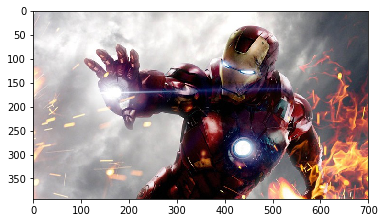

모델의 예측
{'ironman': '100.00%', 'captainamerica': '0.00%', 'torr': '0.00%'}


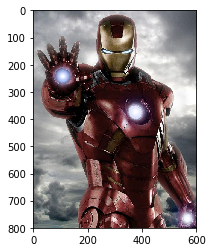

모델의 예측
{'ironman': '0.00%', 'captainamerica': '100.00%', 'torr': '0.00%'}


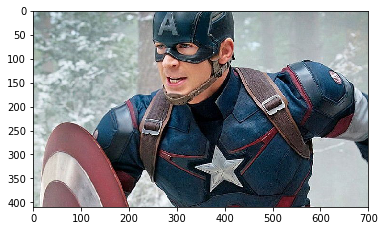

모델의 예측
{'ironman': '0.30%', 'captainamerica': '0.00%', 'torr': '99.70%'}


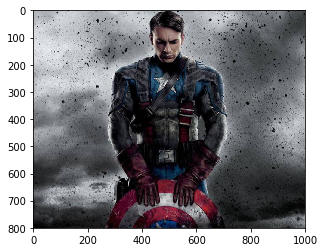

모델의 예측
{'ironman': '0.00%', 'captainamerica': '0.00%', 'torr': '99.90%'}


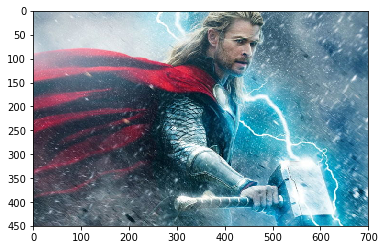

모델의 예측
{'ironman': '0.00%', 'captainamerica': '0.10%', 'torr': '99.90%'}


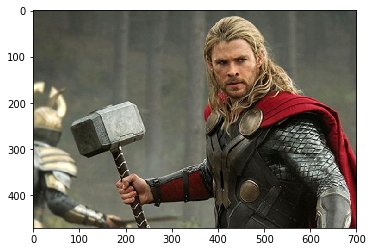

In [0]:
test_path = class0[5:] + class1[5:] + class2[5:]

pred_dict = {labels[0]:0, labels[1]:0, labels[2]:0}

i = 0
for path in test_path:
    print('모델의 예측')
    pred_dict[labels[0]] = '{:.2f}%'.format(pred_test[i][0]*100)
    pred_dict[labels[1]] = '{:.2f}%'.format(pred_test[i][1]*100)
    pred_dict[labels[2]] = '{:.2f}%'.format(pred_test[i][2]*100)
    i = i +1
    print(pred_dict)
    plt.imshow(image.load_img(path))
    plt.show()